#**Amanzon Sales Project !**

###**Import Libraries...**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

###**Loading CSV file of Amazon...**

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/python Learning_PW/pandas practice/amazon_sales.csv")

###**Showing data sample after importing the "Amazon" data...**

In [ ]:
df.head(10)

,Order ID,Order Date,Product,Price,Quantity,City,State
0,221958,01-01-2020,Fire Stick,51.53,4,Chicago,NY
1,771155,01-01-2020,Kindle,91.94,2,Los Angeles,IL
2,231932,01-01-2020,Kindle,64.88,4,New York,NY
3,465838,01-01-2020,Fire Stick,53.52,5,Chicago,CA
4,359178,01-01-2020,Smart Plug,113.79,2,Philadelphia,AZ
5,744167,01-01-2020,Smart Plug,52.31,3,Chicago,CA
6,210268,01-01-2020,Smart Plug,64.82,5,New York,IL
7,832180,01-01-2020,Kindle,85.90,4,Phoenix,AZ
8,154886,01-01-2020,Ring Doorbell,35.50,4,New York,PA
9,237337,01-01-2020,Echo Dot,39.19,4,Los Angeles,IL


###**Showing total number of rows & columns...**

In [ ]:
print(f"Total Number of Rows & Columns:",df.shape)

Total Number of Rows & Columns: (80000, 7)


###**Showing the information & Datatypes of the data...**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order ID    80000 non-null  int64  
 1   Order Date  80000 non-null  object 
 2   Product     80000 non-null  object 
 3   Price       80000 non-null  float64
 4   Quantity    80000 non-null  int64  
 5   City        80000 non-null  object 
 6   State       80000 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 4.3+ MB


###**Changing the Dtype of order_date from "object type" to "date&time" format...**

In [ ]:
df["Order Date"]=pd.to_datetime(df["Order Date"],format="%m-%d-%Y",errors="coerce")

###**Checking the Dtype again after changing the date format...**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order ID    80000 non-null  int64         
 1   Order Date  31549 non-null  datetime64[ns]
 2   Product     80000 non-null  object        
 3   Price       80000 non-null  float64       
 4   Quantity    80000 non-null  int64         
 5   City        80000 non-null  object        
 6   State       80000 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 4.3+ MB


###**Checking the null values if any...**

In [ ]:
df.isnull().sum()

,0
Order ID,0
Order Date,48451
Product,0
Price,0
Quantity,0
City,0
State,0


###**Remove null values...**

In [ ]:
df.dropna(subset=["Order Date"],inplace=True)

###**Checking the null values after removing null**

In [ ]:
df.isnull().sum()

,0
Order ID,0
Order Date,0
Product,0
Price,0
Quantity,0
City,0
State,0


###**Describe the numeric values...**

In [ ]:
df.describe()

,Order ID,Order Date,Price,Quantity
count,31549.000000,31549,31549.000000,31549.000000
mean,550968.219436,2022-12-21 18:12:28.321658368,75.030747,2.988906
min,100005.000000,2020-01-01 00:00:00,30.000000,1.000000
25%,324376.000000,2021-06-12 00:00:00,52.290000,2.000000
50%,551284.000000,2023-01-01 00:00:00,75.090000,3.000000
75%,776624.000000,2024-07-01 00:00:00,97.590000,4.000000
max,999993.000000,2025-12-12 00:00:00,119.990000,5.000000
std,260734.539847,NaN,26.064997,1.420276


#**Data Analyis...**

###**Create a New Column for Total Amount...**

In [ ]:
df["Total Amount"]=df['Price']*df['Quantity']

###**Showing the sample data after adding a new column...**

In [ ]:
df.head(4)

,Order ID,Order Date,Product,Price,Quantity,City,State,Total Amount
0,221958,2020-01-01,Fire Stick,51.53,4,Chicago,NY,206.12
1,771155,2020-01-01,Kindle,91.94,2,Los Angeles,IL,183.88
2,231932,2020-01-01,Kindle,64.88,4,New York,NY,259.52
3,465838,2020-01-01,Fire Stick,53.52,5,Chicago,CA,267.60


###**Checking the Total Sale, Avg Sale, Min Sale, Max Sale...**

In [ ]:
#Total Sales
Total_Sales=df['Total Amount'].sum()

#Avg_Sales
Avg_Sales=df["Total Amount"].mean()

#Min Sales
Min_Sales=df["Total Amount"].min()

#Max Sales
Max_Sales=df["Total Amount"].max()

#Solution
print(f"Total Sales: {Total_Sales}")
print(f"Avg Sales: {Avg_Sales}")
print(f"Min Sales: {Min_Sales}")
print(f"Max Sales: {Max_Sales}")

Total Sales: 7078209.08
Avg Sales: 224.3560518558433
Min Sales: 30.04
Max Sales: 599.9499999999999


###*Total Sales by Product...*

In [ ]:
Sales_by_Product=df.groupby("Product")["Total Amount"].sum().sort_values(ascending=False)
Sales_by_Product

,Total Amount
Product,
Alexa,1202789.24
Kindle,1194213.49
Fire Stick,1174976.33
Smart Plug,1172219.17
Ring Doorbell,1167652.26
Echo Dot,1166358.59


###*Visualize sales by product through pie chart...*

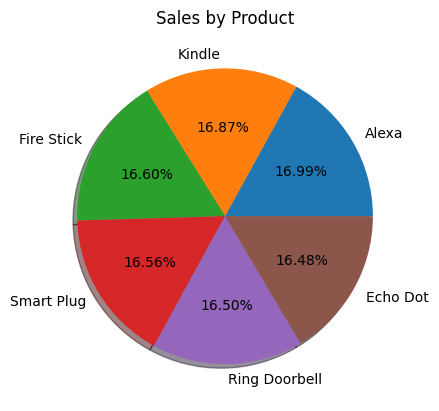

In [ ]:
plt.pie(Sales_by_Product,labels=Sales_by_Product.index,autopct="%1.2f%%",shadow=True)
plt.title("Sales by Product")
plt.show()

###*Product sales by city...*

In [ ]:
Sales_by_City=df.groupby("City")["Total Amount"].sum().sort_values(ascending=False)
Sales_by_City

,Total Amount
City,
Phoenix,1447033.92
Los Angeles,1416875.55
Philadelphia,1416286.88
New York,1407631.44
Chicago,1390381.29


###*Visualize sales by City through line chart...*

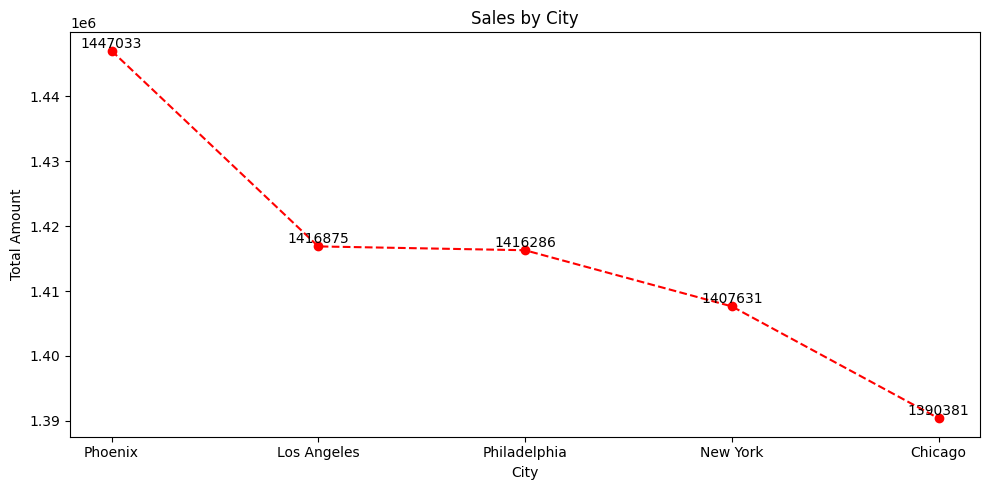

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(Sales_by_City.index, Sales_by_City.values,color="r",linestyle="--",marker="o")
plt.title("Sales by City")
plt.xlabel("City")
plt.ylabel("Total Amount")
plt.tight_layout()

for x,y in zip(Sales_by_City.index,Sales_by_City.values):
  plt.text(x,y,int(y),ha="center",va="bottom")
plt.show()

###*Product sales by State...*

In [ ]:
Sales_by_State=df.groupby("State")["Total Amount"].sum().sort_values(ascending=False)
Sales_by_State

,Total Amount
State,
NY,1442660.47
CA,1416697.79
AZ,1413855.18
PA,1404704.22
IL,1400291.42


###*Visualize sales by City through bar chart...*

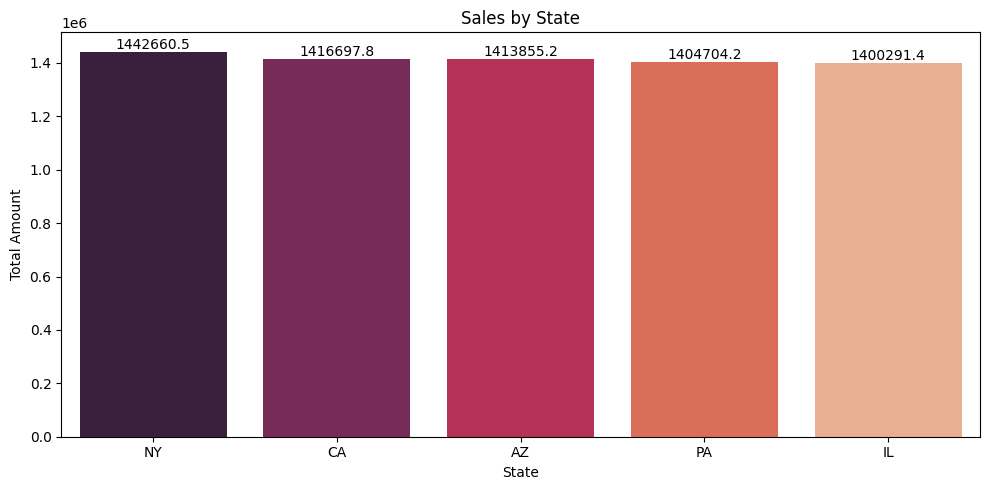

In [ ]:
plt.figure(figsize=(10,5))
a=sns.barplot(x=Sales_by_State.index, y=Sales_by_State.values, palette="rocket")
plt.title("Sales by State")
plt.xlabel("State")
plt.ylabel("Total Amount")
plt.tight_layout()

for bar in a.patches:
  a.text(bar.get_x() + bar.get_width() / 2,
            bar.get_height(),f"{bar.get_height():.1f}",
            ha='center', va='bottom')
plt.show()


###*Maximum Quantity Sale by Order ID*

In [ ]:
Sales_by_order_ID=df.groupby("Order ID")["Quantity"].sum().sort_values(ascending=False).head(10)
Sales_by_order_ID

,Quantity
Order ID,
437850,14
116375,14
617948,12
170793,10
962645,10
228391,10
975049,10
190417,10
800009,10


###*Visualize sales by order id through Heatmap...*

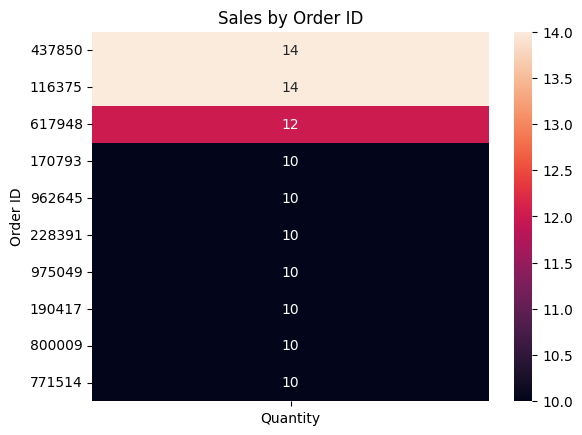

In [ ]:
sns.heatmap(Sales_by_order_ID.to_frame(),annot=True,cmap="rocket")
plt.title("Sales by Order ID")
plt.show()

###*Minimum Quantity Sale by Order ID*

In [ ]:
Min_Sales_by_order_ID=df.groupby("Order ID")["Quantity"].sum().sort_values(ascending=False).tail(10)
Min_Sales_by_order_ID

,Quantity
Order ID,
100574,1
100770,1
100799,1
100910,1
100917,1
101207,1
645282,1
645427,1
645515,1


###*Showing Total quantity sold by each product...*

In [ ]:
df['Product'].value_counts()

,count
Product,
Alexa,5310
Kindle,5301
Fire Stick,5272
Ring Doorbell,5246
Echo Dot,5216
Smart Plug,5204


###*Visualizing total quantity sold by each product through bar Chart...*

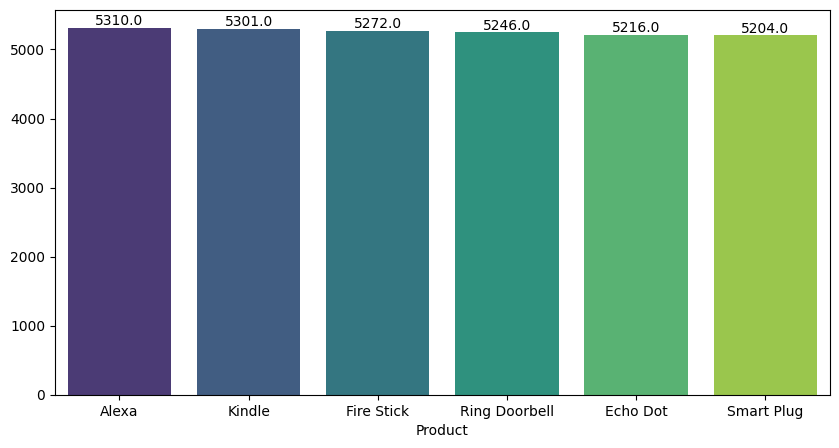

In [ ]:
plt.figure(figsize=(10,5))
a=sns.barplot(x=df['Product'].value_counts().index, y=df['Product'].value_counts().values, palette="viridis")

for bar in a.patches:
  a.text(bar.get_x() + bar.get_width() / 2,
            bar.get_height(),f"{bar.get_height():.1f}",ha="center",va="bottom")

###*Making a "Yearly Sales" column for showing the yearly sales trends...*

In [ ]:
df["Yearly_Sales"]=df["Order Date"].dt.year
df["Yearly_Sales"]

,Yearly_Sales
0,2020
1,2020
2,2020
3,2020
4,2020
...,...
79337,2025
79338,2025
79339,2025
79340,2025


###*Showing the yearly sales trends...*

In [ ]:
Yearly_Sales_Trends=df.groupby("Yearly_Sales")["Total Amount"].sum().sort_values(ascending=False)
Yearly_Sales_Trends

,Total Amount
Yearly_Sales,
2020,1189140.32
2025,1186441.90
2024,1179895.46
2023,1177696.40
2021,1177469.44
2022,1167565.56


###*Visualizing "Yearly Sales" trends through line Chart...*

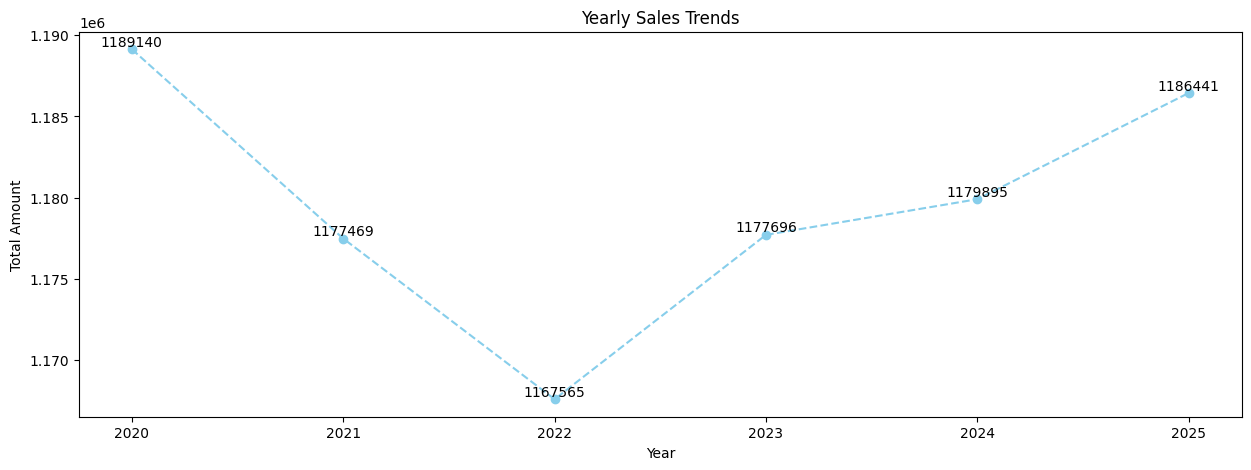

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(Yearly_Sales_Trends.index,Yearly_Sales_Trends.values,marker="o",linestyle="--",color="Skyblue")
plt.title("Yearly Sales Trends")
plt.xlabel("Year")
plt.ylabel("Total Amount")

for x,y in zip(Yearly_Sales_Trends.index,Yearly_Sales_Trends.values):
  plt.text(x,y,int(y),ha="center",va="bottom",fontsize=10)
plt.show()

#*Final Summary: Amazon Sales Analysis...*

**Total Sales Analysis:**

**Total Sales:** $7,078,209.08

**Average Sales per Transaction:** $224.35

**Maximum Sales per Transaction:** $599.94

**Minimum Sales per Transaction:** $30.04

**Top Selling Products:**

**The top-selling products in terms of total sales are:**

Alexa

Kindle

Fire Stick

**Lowest Selling Products:**

**The lowest-selling products are:**

Echo Dot

Ring Doorbell

Smart Plug

**Active Buyers by City:**

**The cities with the highest number of active buyers are:**

Phoenix

Los Angeles

Philadelphia

**The cities with the lowest number of active buyers are:**

Chicago

New York

**Active Buyers by State:**

**The states with the highest number of active buyers are:**

New York (NY)

California (CA)

Arizona (AZ)

**The states with the lowest number of active buyers are:**

Illinois (IL)

Pennsylvania (PA)

**Sales Trends Over Time:**

The year with the maximum sales was 2020.

The year with the minimum sales was 2022.

#✍*Thank You !*